# Exercise 4.10 Coding Etiquette & Excel Reporting_Part 1 /2

1. Import libraries
2. Handling PII/Data Privacy
3. Regional segmentation of the data
4. Excluding low-activity customers
5. Customer profiling

In [7]:
#Import Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [27]:
#Import Dataset
path=r'C:\Users\north\08-2024 Instacart Basket Analysis'
cust_ordsmergefinal=pd.read_pickle(os.path.join(path, '02 Data','Prepared Data', 'custords_merge_final.pkl'))


In [ ]:
cust_ordsmergefinal.columns

In [ ]:
# Group the data by region and income group
region_income_group = cust_ordsmerge.groupby(['region', 'income_group']).size().reset_index(name='Count')

# Create a grouped bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=region_income_group, x='region', y='Count', hue='income_group', palette='viridis')

# Add title and labels
plt.title('Income Group Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Count of Customers')
plt.legend(title='Income Group')

# Save the plot to the specified path
plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'profiles_by_region.png'))
# Show the plot
plt.show()


In [ ]:
#Importing department  dataframe
df_dept = pd.read_csv(os.path.join(path,'02 Data', 'Original Data', 'departments.csv'), index_col=False)

In [ ]:
df_dept

In [ ]:
print(df_dept.columns)

In [ ]:
df_dept.dtypes

In [ ]:
dept_data = {
    'department_id': range(1,22),
    'department': ['frozen', 'other', 'bakery', 'produce', 'alcohol', 'international', 'beverages', 'pets', 
                   'dry goods pasta', 'bulk', 'personal care', 'meat seafood', 'pantry', 'breakfast', 
                   'canned goods', 'dairy eggs', 'household', 'babies', 'snacks', 'deli', 'missing']
}

dept_vertical = pd.DataFrame(dept_data)

# Display the DataFrame
print(dept_vertical)

In [ ]:
dept_vertical.dtypes

In [ ]:
# Changing department_id from int64 to str for merge
dept_vertical['department_id']=dept_vertical['department_id'].astype('int64')

In [ ]:
cust_ordsmergefinal.columns.to_list()

In [ ]:
# Merging dept_vertical to cust_ordsmerge via department_id
df_final=cust_ordsmergefinal.merge(dept_vertical,on='department_id',indicator=True)

In [ ]:
df_final['department'].value_counts()

In [ ]:
#Create department bar charts

# Get the value counts for departments
department_counts = df_final['department'].value_counts()

# Create a bar chart using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=department_counts.index, y=department_counts.values, palette='tab20')

# Add title and labels
plt.title('Department Distribution')
plt.xlabel('Department')
plt.ylabel('Count of Orders')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Save the plot to the specified path
plt.tight_layout()  # Adjust the plot to ensure everything fits
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_department_product.png'))

# Show the plot
plt.show()


In [ ]:
# Creating crosstab to compare age_group profile with departments
age_department_comparison=pd.crosstab(df_final['age_group'],df_final['department'],dropna=False)

In [ ]:
age_department_comparison

In [ ]:
# Create a bar chart
plt.figure(figsize=(18, 12))
age_department_comparison_bar = age_department_comparison.plot(
    kind='barh',
    figsize=(14, 10),
    cmap='tab20')

# Set chart labels and title
plt.title('Age Groups by Department (Stacked)', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Age Group', fontsize=12)
plt.xticks(rotation=45)

# Move legend outside of plot
plt.legend(title='Department', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12, title_fontsize=14)

# Adjust layout to make room for legend
plt.tight_layout(rect=[0, 0, 0.85, 1])

plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_department_comparison_bar.png'))

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
# Creating crosstab to compare income_group profile with departments
income_group_department_comparison=pd.crosstab(df_final['income_group'],df_final['department'],dropna=False)

In [ ]:
income_group_department_comparison

In [ ]:
# Create a bar chart with custom colors
plt.figure(figsize=(18, 12))
income_group_department_comparison_bar = income_group_department_comparison.plot(
    kind='barh',
    figsize=(14, 10),
    cmap='tab20')

# Add title and labels
plt.title('Income Groups by Department')
plt.xlabel('Count')
plt.ylabel('Income Group')

# Adjust layout to make room for legend
plt.tight_layout(rect=[0, 0, 0.85, 1])

# Move legend outside of plot
plt.legend(title='Department', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12, title_fontsize=14)

# Save the plot to the specified path
plt.tight_layout()  # Adjust the plot to ensure everything fits
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'income_department_comparison_bar.png'))


# Show the plot
plt.show()


In [ ]:
# Creating crosstab to compare regions with departments
region_department_comparison=pd.crosstab(df_final['region'],df_final['department'],dropna=False)

In [ ]:
region_department_comparison

In [3]:
plt.figure(figsize=(20, 25))
region_department_comparison_bar = region_department_comparison.plot(kind='barh', figsize=(20, 25), colormap='tab20', rot=0)

# Add title and labels with larger font size
plt.title('Regions By Department', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Regions', fontsize=14)

# Increase font size for ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Move legend outside of plot
plt.legend(title='Department', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12, title_fontsize=14)

# Adjust layout to make room for legend
plt.tight_layout(rect=[0, 0, 0.85, 1])

# Save the plot to the specified path
plt.tight_layout()  # Adjust the plot to ensure everything fits
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'region_department_comparison.png'))

plt.show()

NameError: name 'plt' is not defined

###**Other visualizations**

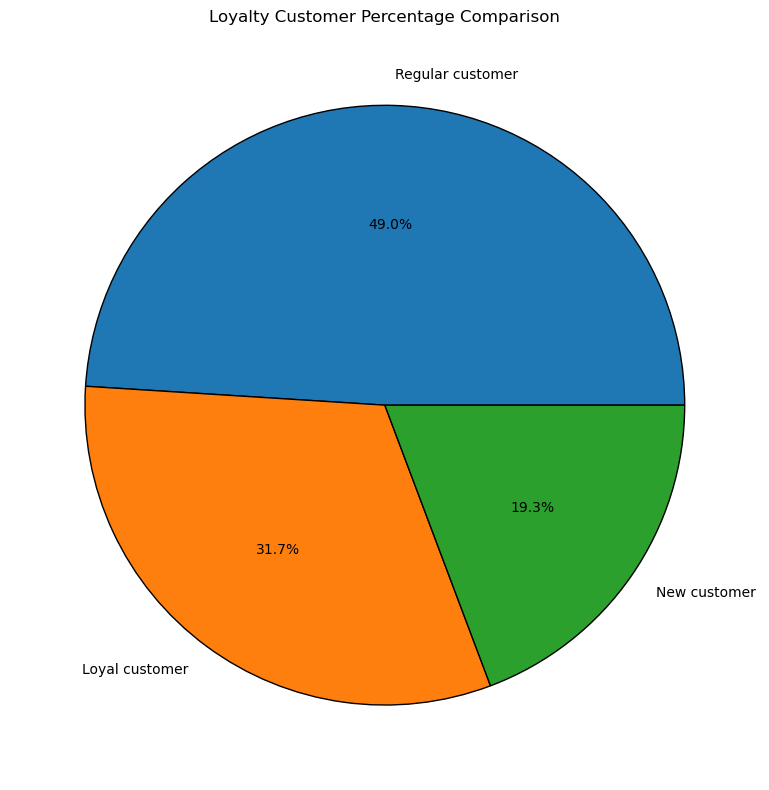

In [110]:
# Creating Pie Chart of customer loyalty breakdown
loyalty_customer_pie= df_final['loyalty_flag'].value_counts()
plt.figure(figsize=(8,8))
loyalty_customer_comparison_pie=loyalty_customer_pie.plot.pie(autopct='%.1f%%',wedgeprops={'edgecolor':'black'})
plt.title('Loyalty Customer Percentage Comparison')
plt.ylabel('')
plt.tight_layout()

plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'loyalty_percentage.png'))
plt.show()